# Early Detection of Child Malnutrition using Machine Learning

This notebook explores machine learning models for early detection of child malnutrition (stunting and wasting) using the Stunting Wasting Dataset from Kaggle.

## Objectives
1. Implement and compare various machine learning models for predicting child stunting
2. Explore different optimization techniques and their impact on model performance
3. Analyze feature importance and relationships in child malnutrition data
4. Create a reliable prediction model for early detection of stunting

## Dataset Information
- Source: Kaggle - Stunting Wasting Dataset
- Target Variable: Stunting (Binary Classification)
- Features: Gender, Age (months), Body Weight, Body Length
- Additional Target: Wasting (not used in this analysis)


# Step 1: Library Imports and Environment Setup

In this section, we import all necessary Python libraries for our analysis:

- **Data Manipulation**: numpy, pandas
- **Visualization**: matplotlib, seaborn
- **Machine Learning**: scikit-learn
- **Deep Learning**: tensorflow
- **Model Persistence**: joblib

We also set random seeds for reproducibility and configure the plotting style for consistent visualizations.


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from google.colab import drive
drive.mount('/content/drive')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Load and display the dataset
# Define the path to your dataset in Google Drive
file_path = '/content/drive/MyDrive/notebook_data/stunting_wasting_dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Configure plot style
# plt.style.use('seaborn')
sns.set_theme(style="whitegrid")



Mounted at /content/drive


# Step 2: Data Loading and Initial Exploration

We load the Stunting Wasting Dataset and perform initial exploratory analysis:

1. Display the first few rows to understand the data structure
2. Check data information (datatypes, non-null counts)
3. Generate summary statistics for numerical columns
4. Check for missing values

This step helps us understand:
- The size and shape of our dataset
- Data types of each column
- Presence of missing values
- Basic statistical properties of numerical features


In [2]:

print("Dataset Overview:")
print("-" * 50)
print("\nFirst few rows:")
display(df.head())

print("\nDataset Info:")
print("-" * 50)
df.info()

print("\nSummary Statistics:")
print("-" * 50)
display(df.describe())

print("\nMissing Values:")
print("-" * 50)
display(df.isnull().sum())


Dataset Overview:
--------------------------------------------------

First few rows:


,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight



Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB

Summary Statistics:
--------------------------------------------------


,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000



Missing Values:
--------------------------------------------------


,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


# Step 3: Feature Engineering and Target Definition

In this step, we prepare our data for modeling:

1. **Column Renaming**:
   - Convert Indonesian column names to English for better readability
   - Standardize naming convention using underscores

2. **Feature Selection**:
   - X (Features): Gender, Age_Months, Body_Weight, Body_Length
   - y (Target): Stunting

This preprocessing step makes our data more accessible and ready for the next stages of analysis.


In [3]:
# Feature Engineering and Target Definition

# Rename columns for easier handling
column_mapping = {
    'Jenis Kelamin': 'Gender',
    'Umur (bulan)': 'Age_Months',
    'Tinggi Badan (cm)': 'Body_Length',
    'Berat Badan (kg)': 'Body_Weight',
    'Stunting': 'Stunting',
    'Wasting': 'Wasting'
}

# Rename the columns
df = df.rename(columns=column_mapping)

# Create gender mapping
gender_mapping = {
    'Laki-laki': 'Male',    # Laki-laki -> Male
    'Perempuan': 'Female'   # Perempuan -> Female
}

# Transform gender values
df['Gender'] = df['Gender'].replace(gender_mapping)

# Define features and target
X = df[['Gender', 'Age_Months', 'Body_Weight', 'Body_Length']]
y = df['Stunting']

# Display the updated column names and first few rows
print("Updated Column Names:")
print("-" * 50)
print(df.columns.tolist())
print("\nFirst few rows after transformation:")
print(df.head())


Updated Column Names:
--------------------------------------------------
['Gender', 'Age_Months', 'Body_Length', 'Body_Weight', 'Stunting', 'Wasting']

First few rows after transformation:
   Gender  Age_Months  Body_Length  Body_Weight          Stunting  \
0    Male          19         91.6         13.3              Tall   
1    Male          20         77.7          8.5           Stunted   
2    Male          10         79.0         10.3            Normal   
3  Female           2         50.3          8.3  Severely Stunted   
4  Female           5         56.4         10.9  Severely Stunted   

              Wasting  
0  Risk of Overweight  
1         Underweight  
2  Risk of Overweight  
3  Risk of Overweight  
4  Risk of Overweight  


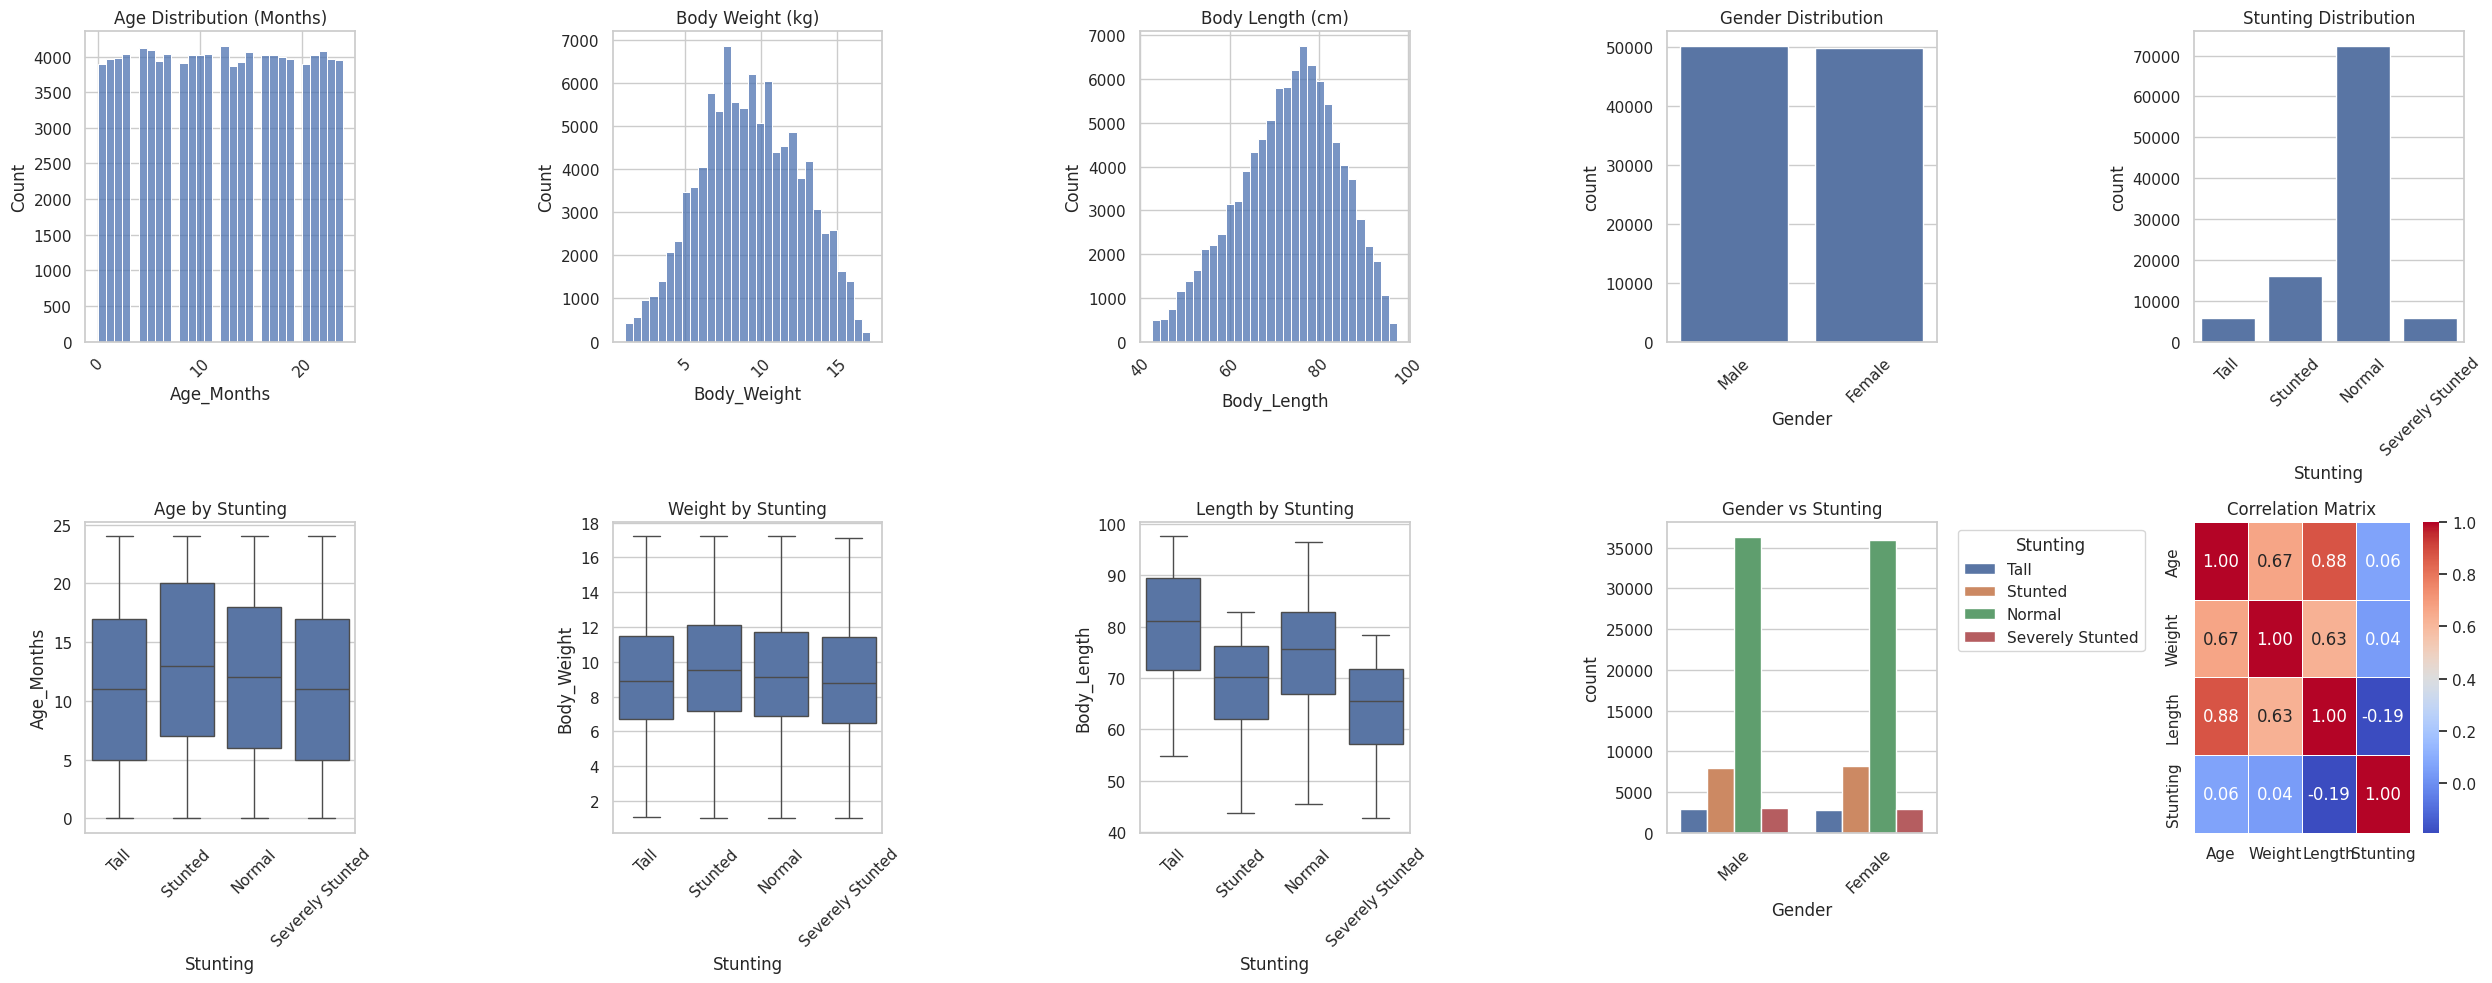

In [4]:
# Comprehensive Data Visualization
import numpy as np

# Create a figure with 5 plots per row
plt.figure(figsize=(25, 10))

# First row: All distribution plots
# 1. Age Distribution
plt.subplot(2, 5, 1)
sns.histplot(data=df, x='Age_Months', bins=30)
plt.title('Age Distribution (Months)')
plt.xticks(rotation=45)

# 2. Body Weight Distribution
plt.subplot(2, 5, 2)
sns.histplot(data=df, x='Body_Weight', bins=30)
plt.title('Body Weight (kg)')
plt.xticks(rotation=45)

# 3. Body Length Distribution
plt.subplot(2, 5, 3)
sns.histplot(data=df, x='Body_Length', bins=30)
plt.title('Body Length (cm)')
plt.xticks(rotation=45)

# 4. Gender Distribution
plt.subplot(2, 5, 4)
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xticks(rotation=45)

# 5. Stunting Distribution
plt.subplot(2, 5, 5)
sns.countplot(data=df, x='Stunting')
plt.title('Stunting Distribution')
plt.xticks(rotation=45)

# Second row: Box plots and correlations
# 6. Age by Stunting
plt.subplot(2, 5, 6)
sns.boxplot(data=df, x='Stunting', y='Age_Months')
plt.title('Age by Stunting')
plt.xticks(rotation=45)

# 7. Weight by Stunting
plt.subplot(2, 5, 7)
sns.boxplot(data=df, x='Stunting', y='Body_Weight')
plt.title('Weight by Stunting')
plt.xticks(rotation=45)

# 8. Length by Stunting
plt.subplot(2, 5, 8)
sns.boxplot(data=df, x='Stunting', y='Body_Length')
plt.title('Length by Stunting')
plt.xticks(rotation=45)

# 9. Gender vs Stunting
plt.subplot(2, 5, 9)
sns.countplot(data=df, x='Gender', hue='Stunting')
plt.title('Gender vs Stunting')
plt.xticks(rotation=45)
plt.legend(title='Stunting', bbox_to_anchor=(1.05, 1), loc='upper left')

# 10. Correlation Heatmap
# Create binary encoding for Stunting status
stunting_encoded = np.where(df['Stunting'] == 'Stunted', 1, 0)

# Create correlation matrix using numpy arrays
age_months = df['Age_Months'].to_numpy()
body_weight = df['Body_Weight'].to_numpy()
body_length = df['Body_Length'].to_numpy()

# Stack the arrays and calculate correlation
numerical_data = np.vstack([age_months, body_weight, body_length, stunting_encoded])
correlation_matrix = np.corrcoef(numerical_data)

# Plot correlation heatmap
plt.subplot(2, 5, 10)
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    xticklabels=['Age', 'Weight', 'Length', 'Stunting'],
    yticklabels=['Age', 'Weight', 'Length', 'Stunting']
)
plt.title('Correlation Matrix')

# Adjust layout
plt.tight_layout()
plt.show()


# Step 5: Data Preprocessing and Train-Test Split

We implement a modular preprocessing pipeline that handles:

1. **Missing Values**:
   - Numerical features: Median imputation
   - Categorical features: Mode imputation

2. **Feature Scaling**:
   - StandardScaler for numerical features
   - Ensures all features are on the same scale for neural networks

3. **Categorical Encoding**:
   - One-hot encoding for categorical variables (Gender)
   - Drop first category to avoid multicollinearity

4. **Data Splitting**:
   - Training set: 80%
   - Validation set: 10%
   - Test set: 10%
   - Stratified split to maintain class distribution

The preprocessing pipeline is wrapped in a function for easy reuse and consistency.


In [5]:
# First, let's check the actual column names
print("Current column names in the dataset:")
print(df.columns.tolist())

def preprocess_data(df, target_column='Stunting'):
    """
    Preprocess the data by handling missing values, encoding categorical variables,
    and scaling numerical features.
    """
    # Separate features and target
    X = df.drop([target_column, 'Wasting'], axis=1)
    y = df[target_column]

    # Define numerical and categorical columns using the English column names
    numerical_features = ['Age_Months', 'Body_Weight', 'Body_Length']
    categorical_features = ['Gender']

    # Create preprocessing pipelines
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Fit and transform the data
    X_processed = preprocessor.fit_transform(X)

    # Get feature names
    numerical_cols = numerical_features  # Already in English
    cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    categorical_cols = []
    for feat, vals in zip(categorical_features, cat_encoder.categories_):
        categorical_cols.extend([f"{feat}_{val}" for val in vals[1:]])

    # Create feature names as pandas Index
    feature_names = pd.Index(numerical_cols + categorical_cols)

    # Convert numpy array to DataFrame with proper column names
    X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

    return X_processed_df, y, preprocessor

# Apply preprocessing
X_processed, y, preprocessor = preprocess_data(df)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Ensure all splits are pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X_processed.columns)
X_val = pd.DataFrame(X_val, columns=X_processed.columns)
X_test = pd.DataFrame(X_test, columns=X_processed.columns)

# Print dataset splits information
print("\nDataset splits:")
print("-" * 50)
print(f"Training set:   {len(X_train):,} samples × {len(X_train.columns)} features")
print(f"Validation set: {len(X_val):,} samples × {len(X_val.columns)} features")
print(f"Test set:      {len(X_test):,} samples × {len(X_test.columns)} features")

# Print feature names
print("\nFeature names after preprocessing:")
print("-" * 50)
print("\n".join(X_processed.columns.tolist()))

Current column names in the dataset:
['Gender', 'Age_Months', 'Body_Length', 'Body_Weight', 'Stunting', 'Wasting']

Dataset splits:
--------------------------------------------------
Training set:   80,000 samples × 4 features
Validation set: 10,000 samples × 4 features
Test set:      10,000 samples × 4 features

Feature names after preprocessing:
--------------------------------------------------
Age_Months
Body_Weight
Body_Length
Gender_Male


# Step 6: Random Forest Model Implementation

We implement a Random Forest Classifier with the following components:

1. **Hyperparameter Tuning**:
   - Using GridSearchCV with 5-fold cross-validation
   - Parameters tuned:
     * Number of trees (n_estimators)
     * Maximum tree depth (max_depth)
     * Minimum samples for split
     * Minimum samples per leaf

2. **Model Evaluation**:
   - Accuracy, F1-score, Recall, and Precision
   - Confusion Matrix visualization
   - Feature importance plot

3. **Model Persistence**:
   - Save the best model using joblib
   - Store in saved_models directory

The Random Forest serves as a strong baseline and provides feature importance insights.


Training Random Forest model...
Performing parameter tuning on data subset...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Training final model on full dataset...


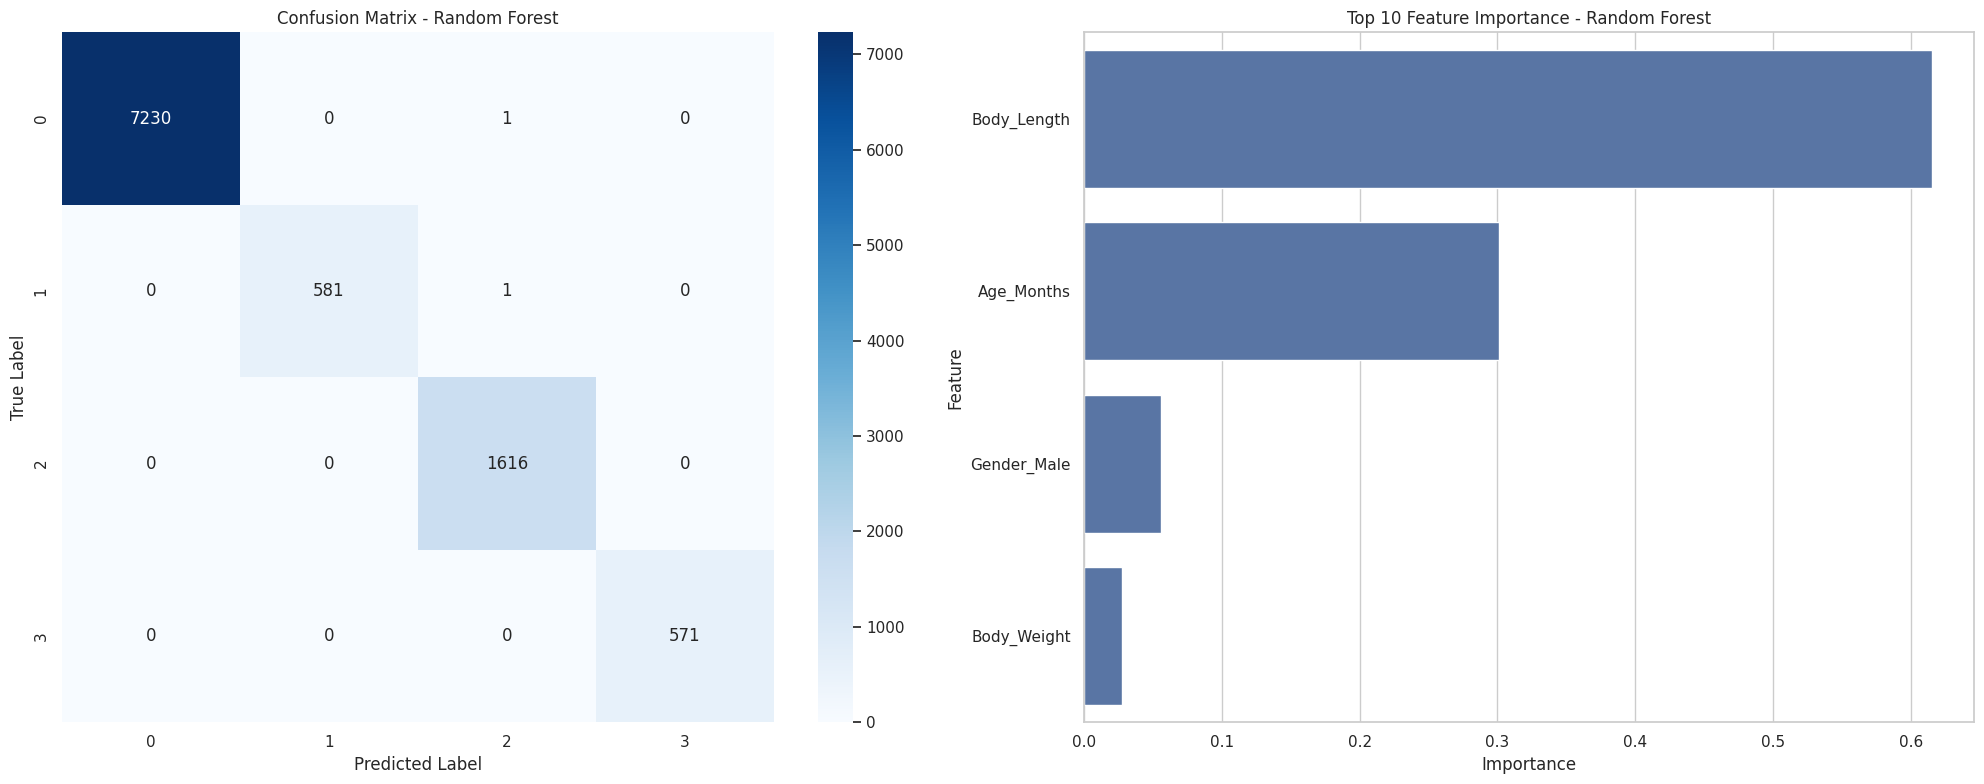


Random Forest Model Performance:
--------------------------------------------------
Accuracy: 0.9998
F1: 0.9998
Recall: 0.9998
Precision: 0.9998


['saved_models/random_forest_optimized.joblib']

In [6]:
def train_evaluate_rf(X_train, y_train, X_test, y_test, X_val, y_val, sample_size=10000):
    """
    Train and evaluate a Random Forest model with efficient hyperparameter tuning.
    Uses a subset of data for initial parameter tuning to speed up the process.

    Args:
        X_train, y_train: Training data
        X_test, y_test: Test data
        X_val, y_val: Validation data
        sample_size: Size of subset to use for parameter tuning (default: 10000)
    """
    # Use a subset of data for parameter tuning
    if X_train.shape[0] > sample_size:
        np.random.seed(42)  # For reproducibility
        if isinstance(X_train, pd.DataFrame):
            # For DataFrame, use sample method which handles indices correctly
            X_subset = X_train.sample(n=sample_size, random_state=42)
            y_subset = y_train[X_subset.index]
        else:
            # For numpy arrays, use choice
            indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
            X_subset = X_train[indices]
            y_subset = y_train[indices]
    else:
        X_subset = X_train
        y_subset = y_train

    # Simplified parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [5, 10]
    }

    # Initialize Random Forest
    rf = RandomForestClassifier(
        random_state=42,
        n_jobs=-1,  # Use all CPU cores
        class_weight='balanced'  # Handle class imbalance
    )

    # Perform GridSearchCV with reduced CV folds
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=3,  # Reduced from 5 to 3
        n_jobs=-1,
        scoring='f1_weighted',  # Changed to f1_weighted for multiclass
        verbose=1
    )

    # Fit on subset
    print("Performing parameter tuning on data subset...")
    grid_search.fit(X_subset, y_subset)

    # Get best parameters
    best_params = grid_search.best_params_
    print(f"Best parameters found: {best_params}")

    # Train final model on full dataset with best parameters
    print("Training final model on full dataset...")
    final_model = RandomForestClassifier(
        **best_params,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )
    final_model.fit(X_train, y_train)

    # Make predictions
    y_pred = final_model.predict(X_test)

    # Calculate metrics with weighted average for multiclass
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred, average='weighted')
    }

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix - Random Forest')
    ax1.set_ylabel('True Label')
    ax1.set_xlabel('Predicted Label')

    # Plot top 10 feature importance
    if isinstance(X_train, pd.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False).head(10)

    sns.barplot(data=feature_importance, x='importance', y='feature', ax=ax2)
    ax2.set_title('Top 10 Feature Importance - Random Forest')
    ax2.set_xlabel('Importance')
    ax2.set_ylabel('Feature')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

    return final_model, metrics

# Train and evaluate Random Forest model
print("Training Random Forest model...")
rf_model, rf_metrics = train_evaluate_rf(X_train, y_train, X_test, y_test, X_val, y_val)

print("\nRandom Forest Model Performance:")
print("-" * 50)
for metric, value in rf_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Save the model
import joblib
import os

# Create directory if it doesn't exist
os.makedirs('saved_models', exist_ok=True)
joblib.dump(rf_model, 'saved_models/random_forest_optimized.joblib')

# Step 7: Neural Network Implementation

We implement four different neural network configurations to explore various optimization techniques:

## Model Architectures

1. **Baseline Model (Instance 1)**:
   - Simple architecture with 2 hidden layers
   - Default Adam optimizer
   - No regularization
   - Fixed number of epochs

2. **L2 Regularized Model (Instance 2)**:
   - Same architecture as baseline
   - Adam optimizer with lower learning rate
   - L2 regularization to prevent overfitting
   - Early stopping for optimal training duration

3. **Dropout Model (Instance 3)**:
   - Deeper architecture with 3 hidden layers
   - RMSprop optimizer
   - Dropout layers for regularization
   - Fixed number of epochs

4. **L1 Regularized Model (Instance 4)**:
   - Same architecture as baseline
   - Adam optimizer with higher learning rate
   - L1 regularization for feature selection
   - Fixed number of epochs

Each model is evaluated using:
- Loss and accuracy curves
- Confusion matrix
- Classification metrics (Accuracy, F1-score, Recall, Precision)

Models are saved in HDF5 format for later use.


In [7]:
# First, let's check the current column names
print("Current column names in the dataset:")
print(df.columns.tolist())

def preprocess_data_for_nn(X, y):
    """
    Preprocess data for neural network training.
    - Converts numerical features to float32
    - One-hot encodes categorical features
    - Converts target to binary format
    """
    # Create a copy to avoid modifying original data
    X_processed = X.copy()

    # Convert numerical columns to float32
    numerical_cols = ['Age_Months', 'Body_Weight', 'Body_Length']
    for col in numerical_cols:
        X_processed[col] = X_processed[col].astype('float32')

    # One-hot encode categorical variables
    X_processed = pd.get_dummies(X_processed, columns=['Gender'])

    # Convert target variable to binary
    # Map 'Stunted' and 'Severely Stunted' to 1, others to 0
    y_binary = (y.isin(['Stunted', 'Severely Stunted'])).astype('float32')

    return X_processed, y_binary

# Split the data first (using English column names since they were already renamed)
X = df[['Gender', 'Age_Months', 'Body_Length', 'Body_Weight']]
y = df['Stunting']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Preprocess training, validation, and test data
print("\nPreprocessing data for neural network...")
X_train_nn, y_train_nn = preprocess_data_for_nn(X_train, y_train)
X_val_nn, y_val_nn = preprocess_data_for_nn(X_val, y_val)
X_test_nn, y_test_nn = preprocess_data_for_nn(X_test, y_test)

print("\nData shapes after preprocessing:")
print(f"X_train_nn shape: {X_train_nn.shape}")
print(f"X_val_nn shape: {X_val_nn.shape}")
print(f"X_test_nn shape: {X_test_nn.shape}")
print(f"\nFeature names: {X_train_nn.columns.tolist()}")


Current column names in the dataset:
['Gender', 'Age_Months', 'Body_Length', 'Body_Weight', 'Stunting', 'Wasting']

Preprocessing data for neural network...

Data shapes after preprocessing:
X_train_nn shape: (70000, 5)
X_val_nn shape: (15000, 5)
X_test_nn shape: (15000, 5)

Feature names: ['Age_Months', 'Body_Length', 'Body_Weight', 'Gender_Female', 'Gender_Male']


In [8]:
# Neural Network Model Creation and Training Functions

def create_nn_model(input_dim, optimizer='adam', learning_rate=0.001,
                   regularizer_type=None, regularizer_strength=0.01,
                   dropout_rate=None, hidden_layers=[64, 32]):
    """
    Create a neural network model with specified configuration.
    """
    model = Sequential()

    # First hidden layer
    reg = None
    if regularizer_type == 'l1':
        reg = l1(regularizer_strength)
    elif regularizer_type == 'l2':
        reg = l2(regularizer_strength)

    # Input layer
    model.add(Dense(hidden_layers[0], activation='relu', input_dim=input_dim, kernel_regularizer=reg))
    if dropout_rate:
        model.add(Dropout(dropout_rate))

    # Hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu', kernel_regularizer=reg))
        if dropout_rate:
            model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Configure optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = RMSprop(learning_rate=learning_rate)

    # Compile model
    model.compile(optimizer=opt,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    return model

def train_evaluate_nn(model, X_train, y_train, X_test, y_test, X_val, y_val,
                     epochs=50, batch_size=32, use_early_stopping=False,
                     model_name='neural_network'):
    """
    Train and evaluate a neural network model.
    """
    callbacks = []
    if use_early_stopping:
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
        callbacks.append(early_stopping)

    # Model checkpoint
    checkpoint = ModelCheckpoint(
        f'saved_models/{model_name}.h5',
        monitor='val_loss',
        save_best_only=True
    )
    callbacks.append(checkpoint)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred, average='weighted')
    }

    return history, metrics

# Create directory for saved models if it doesn't exist
import os
os.makedirs('saved_models', exist_ok=True)

# Initialize results list to store all model performances
results = []

# Simple NN Baseline

In [9]:
# Instance 1: Simple NN (Baseline)
print("\nTraining Neural Network - Instance 1 (Baseline)")
print("-" * 50)

# Use preprocessed data dimensions
input_dim = X_train_nn.shape[1]
model1 = create_nn_model(
    input_dim=input_dim,    # Number of input features
    optimizer='adam',       # Using Adam optimizer with default settings
    hidden_layers=[64, 32, 16]  # Three hidden layers with 64 and 32 and 16 neurons
)

# Convert pandas DataFrames to numpy arrays for training
X_train_arr = X_train_nn.values.astype('float32')
X_val_arr = X_val_nn.values.astype('float32')
X_test_arr = X_test_nn.values.astype('float32')
y_train_arr = y_train_nn.values.astype('float32')
y_val_arr = y_val_nn.values.astype('float32')
y_test_arr = y_test_nn.values.astype('float32')

# Train the model and get performance metrics
history1, metrics1 = train_evaluate_nn(
    model1, X_train_arr, y_train_arr, X_test_arr, y_test_arr, X_val_arr, y_val_arr,
    epochs=50,
    use_early_stopping=False,
    model_name='nn_model_instance1'
)

print("\nBaseline Model Performance:")
print("-" * 50)
for metric, value in metrics1.items():
    print(f"{metric.capitalize()}: {value:.4f}")

results.append({
    'name': 'Baseline NN',
    'config': 'Simple 2-layer, Adam (default)',
    'metrics': metrics1
})


Training Neural Network - Instance 1 (Baseline)
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.4590

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7915 - loss: 0.4589 - val_accuracy: 0.8078 - val_loss: 0.3550
Epoch 2/50
2159/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8887 - loss: 0.2489

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8890 - loss: 0.2484 - val_accuracy: 0.8434 - val_loss: 0.2787
Epoch 3/50
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9421 - loss: 0.1369

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9422 - loss: 0.1369 - val_accuracy: 0.9043 - val_loss: 0.1810
Epoch 4/50
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9546 - loss: 0.1069

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9545 - loss: 0.1070 - val_accuracy: 0.9520 - val_loss: 0.0969
Epoch 5/50
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9581 - loss: 0.1005

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9580 - loss: 0.1005 - val_accuracy: 0.9659 - val_loss: 0.0743
Epoch 6/50
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9608 - loss: 0.0926

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9608 - loss: 0.0926 - val_accuracy: 0.9780 - val_loss: 0.0603
Epoch 7/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9624 - loss: 0.0890 - val_accuracy: 0.9788 - val_loss: 0.0603
Epoch 8/50
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9628 - loss: 0.0875

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9628 - loss: 0.0875 - val_accuracy: 0.9844 - val_loss: 0.0533
Epoch 9/50
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9644 - loss: 0.0834

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9644 - loss: 0.0835 - val_accuracy: 0.9857 - val_loss: 0.0503
Epoch 10/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9654 - loss: 0.0792 - val_accuracy: 0.9751 - val_loss: 0.0573
Epoch 11/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9655 - loss: 0.0790 - val_accuracy: 0.9686 - val_loss: 0.0642
Epoch 12/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9671 - loss: 0.0764 - val_accuracy: 0.9702 - val_loss: 0.0618
Epoch 13/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9693 - loss: 0.0739 - val_accuracy: 0.9682 - val_loss: 0.0630
Epoch 14/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9695 - loss: 0.0723 - val_accuracy: 0.9739 - val_loss: 0.0546
Epoch 15/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9686 - loss: 0.0725 - val_accuracy: 0.9654 - val_loss: 0.0663
Epoch 16/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9673 - loss: 0.0757 - val

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9733 - loss: 0.0620 - val_accuracy: 0.9783 - val_loss: 0.0473
Epoch 33/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9722 - loss: 0.0647 - val_accuracy: 0.9717 - val_loss: 0.0560
Epoch 34/50
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9720 - loss: 0.0643

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9720 - loss: 0.0643 - val_accuracy: 0.9851 - val_loss: 0.0434
Epoch 35/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9726 - loss: 0.0644 - val_accuracy: 0.9680 - val_loss: 0.0609
Epoch 36/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9724 - loss: 0.0649 - val_accuracy: 0.9701 - val_loss: 0.0584
Epoch 37/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9719 - loss: 0.0646 - val_accuracy: 0.9808 - val_loss: 0.0491
Epoch 38/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9721 - loss: 0.0633 - val_accuracy: 0.9760 - val_loss: 0.0513
Epoch 39/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9724 - loss: 0.0626 - val_accuracy: 0.9819 - val_loss: 0.0535
Epoch 40/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9721 - loss: 0.0637 - val_accuracy: 0.9777 - val_loss: 0.0575
Epoch 41/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9719 - loss: 0.0632 -

# Instance 2: Adam with L2 Regularization and Early Stopping

In [10]:
# Instance 2: Adam with L2 Regularization and Early Stopping
print("\nTraining Neural Network - Instance 2 (L2 + Early Stopping)")
print("-" * 50)

model2 = create_nn_model(
    input_dim=input_dim,
    optimizer='adam',
    learning_rate=0.0001,
    regularizer_type='l2',
    regularizer_strength=0.001,
    hidden_layers=[64, 32, 16]
)

# Train the model and get performance metrics
history2, metrics2 = train_evaluate_nn(
    model2, X_train_arr, y_train_arr, X_test_arr, y_test_arr, X_val_arr, y_val_arr,
    epochs=200,
    use_early_stopping=True,
    model_name='nn_model_instance2'
)

print("\nL2 Regularized Model Performance:")
print("-" * 50)
for metric, value in metrics2.items():
    print(f"{metric.capitalize()}: {value:.4f}")

results.append({
    'name': 'L2 Regularized NN',
    'config': 'Adam (LR=0.0001), L2, Early Stopping',
    'metrics': metrics2
})


Training Neural Network - Instance 2 (L2 + Early Stopping)
--------------------------------------------------
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2162/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7815 - loss: 0.7891

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7815 - loss: 0.7864 - val_accuracy: 0.7979 - val_loss: 0.4873
Epoch 2/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4744

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7998 - loss: 0.4744 - val_accuracy: 0.8069 - val_loss: 0.4529
Epoch 3/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8103 - loss: 0.4425

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8103 - loss: 0.4425 - val_accuracy: 0.8107 - val_loss: 0.4252
Epoch 4/200
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8166 - loss: 0.4152

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8167 - loss: 0.4151 - val_accuracy: 0.8175 - val_loss: 0.3935
Epoch 5/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8271 - loss: 0.3830

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8271 - loss: 0.3830 - val_accuracy: 0.8222 - val_loss: 0.3605
Epoch 6/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8434 - loss: 0.3461

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8435 - loss: 0.3460 - val_accuracy: 0.8281 - val_loss: 0.3318
Epoch 7/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3077

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8645 - loss: 0.3077 - val_accuracy: 0.8382 - val_loss: 0.3007
Epoch 8/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8936 - loss: 0.2715

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8936 - loss: 0.2715 - val_accuracy: 0.8570 - val_loss: 0.2686
Epoch 9/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9227 - loss: 0.2404

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9227 - loss: 0.2403 - val_accuracy: 0.8855 - val_loss: 0.2401
Epoch 10/200
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9411 - loss: 0.2154

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9412 - loss: 0.2153 - val_accuracy: 0.9062 - val_loss: 0.2175
Epoch 11/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9517 - loss: 0.1958

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9518 - loss: 0.1958 - val_accuracy: 0.9213 - val_loss: 0.1991
Epoch 12/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9571 - loss: 0.1806

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9571 - loss: 0.1806 - val_accuracy: 0.9327 - val_loss: 0.1852
Epoch 13/200
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0.1687

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9607 - loss: 0.1687 - val_accuracy: 0.9396 - val_loss: 0.1739
Epoch 14/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9625 - loss: 0.1592

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9625 - loss: 0.1592 - val_accuracy: 0.9448 - val_loss: 0.1649
Epoch 15/200
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.1515

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9645 - loss: 0.1514 - val_accuracy: 0.9489 - val_loss: 0.1572
Epoch 16/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.1451

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9659 - loss: 0.1451 - val_accuracy: 0.9519 - val_loss: 0.1511
Epoch 17/200
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9670 - loss: 0.1398

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9670 - loss: 0.1398 - val_accuracy: 0.9547 - val_loss: 0.1454
Epoch 18/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9676 - loss: 0.1353

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9676 - loss: 0.1353 - val_accuracy: 0.9571 - val_loss: 0.1407
Epoch 19/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9685 - loss: 0.1315

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9685 - loss: 0.1314 - val_accuracy: 0.9603 - val_loss: 0.1349
Epoch 20/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.1281

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9694 - loss: 0.1280 - val_accuracy: 0.9622 - val_loss: 0.1308
Epoch 21/200
2160/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.1252

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9699 - loss: 0.1251 - val_accuracy: 0.9635 - val_loss: 0.1273
Epoch 22/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.1226

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9704 - loss: 0.1226 - val_accuracy: 0.9657 - val_loss: 0.1236
Epoch 23/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9706 - loss: 0.1203

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9706 - loss: 0.1203 - val_accuracy: 0.9670 - val_loss: 0.1209
Epoch 24/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.1183

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9711 - loss: 0.1183 - val_accuracy: 0.9683 - val_loss: 0.1183
Epoch 25/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9714 - loss: 0.1166

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9714 - loss: 0.1166 - val_accuracy: 0.9699 - val_loss: 0.1160
Epoch 26/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9716 - loss: 0.1150

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9716 - loss: 0.1150 - val_accuracy: 0.9704 - val_loss: 0.1137
Epoch 27/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9718 - loss: 0.1134

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9718 - loss: 0.1134 - val_accuracy: 0.9712 - val_loss: 0.1121
Epoch 28/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9725 - loss: 0.1121

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9725 - loss: 0.1121 - val_accuracy: 0.9719 - val_loss: 0.1104
Epoch 29/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9729 - loss: 0.1108

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9729 - loss: 0.1108 - val_accuracy: 0.9719 - val_loss: 0.1091
Epoch 30/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9731 - loss: 0.1096

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9731 - loss: 0.1096 - val_accuracy: 0.9723 - val_loss: 0.1080
Epoch 31/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9732 - loss: 0.1086

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9732 - loss: 0.1086 - val_accuracy: 0.9727 - val_loss: 0.1067
Epoch 32/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9733 - loss: 0.1076

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9733 - loss: 0.1076 - val_accuracy: 0.9735 - val_loss: 0.1054
Epoch 33/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9735 - loss: 0.1067

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9735 - loss: 0.1067 - val_accuracy: 0.9743 - val_loss: 0.1042
Epoch 34/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9736 - loss: 0.1059

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9736 - loss: 0.1059 - val_accuracy: 0.9751 - val_loss: 0.1031
Epoch 35/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9737 - loss: 0.1052

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9737 - loss: 0.1051 - val_accuracy: 0.9753 - val_loss: 0.1022
Epoch 36/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9740 - loss: 0.1045

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9740 - loss: 0.1045 - val_accuracy: 0.9759 - val_loss: 0.1013
Epoch 37/200
2162/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9741 - loss: 0.1038

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9741 - loss: 0.1038 - val_accuracy: 0.9765 - val_loss: 0.1002
Epoch 38/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9741 - loss: 0.1032

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9741 - loss: 0.1032 - val_accuracy: 0.9765 - val_loss: 0.0997
Epoch 39/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9743 - loss: 0.1026

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9743 - loss: 0.1026 - val_accuracy: 0.9773 - val_loss: 0.0988
Epoch 40/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9744 - loss: 0.1020

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9744 - loss: 0.1020 - val_accuracy: 0.9769 - val_loss: 0.0982
Epoch 41/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9744 - loss: 0.1015

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9744 - loss: 0.1015 - val_accuracy: 0.9776 - val_loss: 0.0973
Epoch 42/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 0.1010

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9746 - loss: 0.1010 - val_accuracy: 0.9774 - val_loss: 0.0969
Epoch 43/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9746 - loss: 0.1005

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9746 - loss: 0.1005 - val_accuracy: 0.9779 - val_loss: 0.0961
Epoch 44/200
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.1001

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9747 - loss: 0.1000 - val_accuracy: 0.9781 - val_loss: 0.0956
Epoch 45/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9746 - loss: 0.0997

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9746 - loss: 0.0997 - val_accuracy: 0.9783 - val_loss: 0.0950
Epoch 46/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9747 - loss: 0.0992

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9747 - loss: 0.0992 - val_accuracy: 0.9785 - val_loss: 0.0945
Epoch 47/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9748 - loss: 0.0988

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9748 - loss: 0.0988 - val_accuracy: 0.9785 - val_loss: 0.0941
Epoch 48/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9748 - loss: 0.0984

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9748 - loss: 0.0984 - val_accuracy: 0.9787 - val_loss: 0.0934
Epoch 49/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.0981

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9748 - loss: 0.0981 - val_accuracy: 0.9787 - val_loss: 0.0931
Epoch 50/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9749 - loss: 0.0977

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9749 - loss: 0.0977 - val_accuracy: 0.9787 - val_loss: 0.0926
Epoch 51/200
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.0974

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9750 - loss: 0.0974 - val_accuracy: 0.9788 - val_loss: 0.0922
Epoch 52/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.0970

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9750 - loss: 0.0970 - val_accuracy: 0.9789 - val_loss: 0.0918
Epoch 53/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.0967

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9750 - loss: 0.0967 - val_accuracy: 0.9790 - val_loss: 0.0915
Epoch 54/200
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9751 - loss: 0.0963

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9751 - loss: 0.0963 - val_accuracy: 0.9794 - val_loss: 0.0910
Epoch 55/200
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9751 - loss: 0.0961

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9751 - loss: 0.0960 - val_accuracy: 0.9796 - val_loss: 0.0906
Epoch 56/200
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.0957

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9752 - loss: 0.0957 - val_accuracy: 0.9796 - val_loss: 0.0901
Epoch 57/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.0955

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9752 - loss: 0.0954 - val_accuracy: 0.9795 - val_loss: 0.0898
Epoch 58/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9751 - loss: 0.0952

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9751 - loss: 0.0952 - val_accuracy: 0.9796 - val_loss: 0.0895
Epoch 59/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9753 - loss: 0.0949

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9753 - loss: 0.0949 - val_accuracy: 0.9795 - val_loss: 0.0892
Epoch 60/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.0946

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9752 - loss: 0.0946 - val_accuracy: 0.9795 - val_loss: 0.0890
Epoch 61/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9752 - loss: 0.0944

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9753 - loss: 0.0944 - val_accuracy: 0.9795 - val_loss: 0.0887
Epoch 62/200
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.0942

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9753 - loss: 0.0941 - val_accuracy: 0.9797 - val_loss: 0.0885
Epoch 63/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.0939

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9752 - loss: 0.0939 - val_accuracy: 0.9796 - val_loss: 0.0883
Epoch 64/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9751 - loss: 0.0935 - val_accuracy: 0.9788 - val_loss: 0.0887
Epoch 65/200
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9761 - loss: 0.0922

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9761 - loss: 0.0922 - val_accuracy: 0.9793 - val_loss: 0.0873
Epoch 66/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.0912

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9767 - loss: 0.0912 - val_accuracy: 0.9795 - val_loss: 0.0865
Epoch 67/200
2161/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9770 - loss: 0.0909

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9770 - loss: 0.0909 - val_accuracy: 0.9803 - val_loss: 0.0860
Epoch 68/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9768 - loss: 0.0906

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9768 - loss: 0.0906 - val_accuracy: 0.9807 - val_loss: 0.0853
Epoch 69/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.0903

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9773 - loss: 0.0903 - val_accuracy: 0.9808 - val_loss: 0.0851
Epoch 70/200
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9771 - loss: 0.0901

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9771 - loss: 0.0901 - val_accuracy: 0.9809 - val_loss: 0.0848
Epoch 71/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9772 - loss: 0.0898

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9772 - loss: 0.0898 - val_accuracy: 0.9809 - val_loss: 0.0842
Epoch 72/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9772 - loss: 0.0896

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9772 - loss: 0.0896 - val_accuracy: 0.9811 - val_loss: 0.0840
Epoch 73/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9772 - loss: 0.0893

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9772 - loss: 0.0893 - val_accuracy: 0.9812 - val_loss: 0.0835
Epoch 74/200
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.0890

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9773 - loss: 0.0890 - val_accuracy: 0.9813 - val_loss: 0.0832
Epoch 75/200
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.0888

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9773 - loss: 0.0888 - val_accuracy: 0.9814 - val_loss: 0.0830
Epoch 76/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9772 - loss: 0.0886

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9772 - loss: 0.0886 - val_accuracy: 0.9810 - val_loss: 0.0828
Epoch 77/200
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9772 - loss: 0.0884

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9772 - loss: 0.0884 - val_accuracy: 0.9813 - val_loss: 0.0826
Epoch 78/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.0881

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9774 - loss: 0.0881 - val_accuracy: 0.9812 - val_loss: 0.0824
Epoch 79/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.0879

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9774 - loss: 0.0879 - val_accuracy: 0.9813 - val_loss: 0.0821
Epoch 80/200
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.0876

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9775 - loss: 0.0876 - val_accuracy: 0.9812 - val_loss: 0.0819
Epoch 81/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9776 - loss: 0.0874

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9776 - loss: 0.0874 - val_accuracy: 0.9814 - val_loss: 0.0816
Epoch 82/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9776 - loss: 0.0872

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9776 - loss: 0.0872 - val_accuracy: 0.9816 - val_loss: 0.0814
Epoch 83/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.0869

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9777 - loss: 0.0869 - val_accuracy: 0.9816 - val_loss: 0.0812
Epoch 84/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.0867

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9777 - loss: 0.0867 - val_accuracy: 0.9815 - val_loss: 0.0810
Epoch 85/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.0865

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9777 - loss: 0.0865 - val_accuracy: 0.9816 - val_loss: 0.0808
Epoch 86/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9778 - loss: 0.0863

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9778 - loss: 0.0863 - val_accuracy: 0.9814 - val_loss: 0.0806
Epoch 87/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.0860

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9777 - loss: 0.0860 - val_accuracy: 0.9813 - val_loss: 0.0804
Epoch 88/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9781 - loss: 0.0857 - val_accuracy: 0.9809 - val_loss: 0.0804
Epoch 89/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9781 - loss: 0.0854

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9781 - loss: 0.0853 - val_accuracy: 0.9808 - val_loss: 0.0801
Epoch 90/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9781 - loss: 0.0851

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9781 - loss: 0.0850 - val_accuracy: 0.9809 - val_loss: 0.0800
Epoch 91/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9782 - loss: 0.0848

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9782 - loss: 0.0848 - val_accuracy: 0.9808 - val_loss: 0.0798
Epoch 92/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9783 - loss: 0.0844

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9783 - loss: 0.0844 - val_accuracy: 0.9811 - val_loss: 0.0793
Epoch 93/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.0841

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9784 - loss: 0.0841 - val_accuracy: 0.9811 - val_loss: 0.0789
Epoch 94/200
2160/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.0838

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9784 - loss: 0.0838 - val_accuracy: 0.9815 - val_loss: 0.0786
Epoch 95/200
2161/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9785 - loss: 0.0836

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9785 - loss: 0.0836 - val_accuracy: 0.9815 - val_loss: 0.0783
Epoch 96/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.0833

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9786 - loss: 0.0833 - val_accuracy: 0.9817 - val_loss: 0.0780
Epoch 97/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.0830

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9786 - loss: 0.0830 - val_accuracy: 0.9817 - val_loss: 0.0778
Epoch 98/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.0828

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9786 - loss: 0.0828 - val_accuracy: 0.9817 - val_loss: 0.0776
Epoch 99/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9787 - loss: 0.0826

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9787 - loss: 0.0825 - val_accuracy: 0.9818 - val_loss: 0.0774
Epoch 100/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9787 - loss: 0.0823

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9787 - loss: 0.0823 - val_accuracy: 0.9817 - val_loss: 0.0772
Epoch 101/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9788 - loss: 0.0821

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9788 - loss: 0.0821 - val_accuracy: 0.9817 - val_loss: 0.0770
Epoch 102/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9791 - loss: 0.0819

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9791 - loss: 0.0819 - val_accuracy: 0.9821 - val_loss: 0.0767
Epoch 103/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9791 - loss: 0.0817

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9791 - loss: 0.0817 - val_accuracy: 0.9819 - val_loss: 0.0765
Epoch 104/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9791 - loss: 0.0815

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9791 - loss: 0.0815 - val_accuracy: 0.9820 - val_loss: 0.0763
Epoch 105/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9792 - loss: 0.0813

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9792 - loss: 0.0812 - val_accuracy: 0.9819 - val_loss: 0.0762
Epoch 106/200
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9792 - loss: 0.0810

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9792 - loss: 0.0810 - val_accuracy: 0.9819 - val_loss: 0.0760
Epoch 107/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9794 - loss: 0.0809

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9794 - loss: 0.0808 - val_accuracy: 0.9820 - val_loss: 0.0758
Epoch 108/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9794 - loss: 0.0806 - val_accuracy: 0.9817 - val_loss: 0.0758
Epoch 109/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9794 - loss: 0.0804

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9795 - loss: 0.0804 - val_accuracy: 0.9817 - val_loss: 0.0756
Epoch 110/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0802

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9796 - loss: 0.0802 - val_accuracy: 0.9821 - val_loss: 0.0752
Epoch 111/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0800

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9795 - loss: 0.0800 - val_accuracy: 0.9820 - val_loss: 0.0751
Epoch 112/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0798

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9796 - loss: 0.0798 - val_accuracy: 0.9815 - val_loss: 0.0750
Epoch 113/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9796 - loss: 0.0797

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9796 - loss: 0.0797 - val_accuracy: 0.9817 - val_loss: 0.0748
Epoch 114/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9798 - loss: 0.0795

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9798 - loss: 0.0794 - val_accuracy: 0.9817 - val_loss: 0.0746
Epoch 115/200
2160/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0793

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9796 - loss: 0.0793 - val_accuracy: 0.9817 - val_loss: 0.0743
Epoch 116/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9797 - loss: 0.0791

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9797 - loss: 0.0791 - val_accuracy: 0.9816 - val_loss: 0.0742
Epoch 117/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9797 - loss: 0.0789

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9797 - loss: 0.0789 - val_accuracy: 0.9819 - val_loss: 0.0740
Epoch 118/200
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9799 - loss: 0.0787

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9799 - loss: 0.0787 - val_accuracy: 0.9815 - val_loss: 0.0739
Epoch 119/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9798 - loss: 0.0785

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9798 - loss: 0.0784 - val_accuracy: 0.9818 - val_loss: 0.0738
Epoch 120/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - loss: 0.0783

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9799 - loss: 0.0783 - val_accuracy: 0.9817 - val_loss: 0.0736
Epoch 121/200
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.0781

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9800 - loss: 0.0780 - val_accuracy: 0.9819 - val_loss: 0.0733
Epoch 122/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.0778

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9800 - loss: 0.0778 - val_accuracy: 0.9822 - val_loss: 0.0729
Epoch 123/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.0776

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9800 - loss: 0.0776 - val_accuracy: 0.9823 - val_loss: 0.0727
Epoch 124/200
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.0774

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9801 - loss: 0.0774 - val_accuracy: 0.9822 - val_loss: 0.0726
Epoch 125/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.0773

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9802 - loss: 0.0772 - val_accuracy: 0.9824 - val_loss: 0.0723
Epoch 126/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9801 - loss: 0.0771

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9801 - loss: 0.0771 - val_accuracy: 0.9824 - val_loss: 0.0722
Epoch 127/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9803 - loss: 0.0769

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9803 - loss: 0.0769 - val_accuracy: 0.9825 - val_loss: 0.0719
Epoch 128/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9803 - loss: 0.0768

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9803 - loss: 0.0768 - val_accuracy: 0.9824 - val_loss: 0.0718
Epoch 129/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9803 - loss: 0.0766

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9803 - loss: 0.0766 - val_accuracy: 0.9825 - val_loss: 0.0716
Epoch 130/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9804 - loss: 0.0764

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9804 - loss: 0.0764 - val_accuracy: 0.9825 - val_loss: 0.0714
Epoch 131/200
2162/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9805 - loss: 0.0763

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9805 - loss: 0.0763 - val_accuracy: 0.9826 - val_loss: 0.0712
Epoch 132/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9805 - loss: 0.0762

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9805 - loss: 0.0762 - val_accuracy: 0.9825 - val_loss: 0.0710
Epoch 133/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9805 - loss: 0.0760

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9805 - loss: 0.0760 - val_accuracy: 0.9827 - val_loss: 0.0709
Epoch 134/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0759

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9806 - loss: 0.0759 - val_accuracy: 0.9827 - val_loss: 0.0708
Epoch 135/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.0756

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9807 - loss: 0.0756 - val_accuracy: 0.9828 - val_loss: 0.0705
Epoch 136/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0755

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9806 - loss: 0.0755 - val_accuracy: 0.9826 - val_loss: 0.0704
Epoch 137/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.0754

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9807 - loss: 0.0754 - val_accuracy: 0.9829 - val_loss: 0.0703
Epoch 138/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.0752

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9808 - loss: 0.0752 - val_accuracy: 0.9829 - val_loss: 0.0701
Epoch 139/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.0751

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9808 - loss: 0.0750 - val_accuracy: 0.9829 - val_loss: 0.0700
Epoch 140/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0748

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9808 - loss: 0.0748 - val_accuracy: 0.9831 - val_loss: 0.0697
Epoch 141/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0748

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9808 - loss: 0.0748 - val_accuracy: 0.9830 - val_loss: 0.0696
Epoch 142/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9809 - loss: 0.0746

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9809 - loss: 0.0746 - val_accuracy: 0.9830 - val_loss: 0.0694
Epoch 143/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9809 - loss: 0.0744

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9809 - loss: 0.0744 - val_accuracy: 0.9831 - val_loss: 0.0693
Epoch 144/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9810 - loss: 0.0743

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9810 - loss: 0.0743 - val_accuracy: 0.9832 - val_loss: 0.0691
Epoch 145/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9811 - loss: 0.0741

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9811 - loss: 0.0741 - val_accuracy: 0.9833 - val_loss: 0.0690
Epoch 146/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9811 - loss: 0.0740

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9811 - loss: 0.0740 - val_accuracy: 0.9834 - val_loss: 0.0688
Epoch 147/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9811 - loss: 0.0739

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9811 - loss: 0.0738 - val_accuracy: 0.9834 - val_loss: 0.0687
Epoch 148/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9811 - loss: 0.0737

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9811 - loss: 0.0737 - val_accuracy: 0.9834 - val_loss: 0.0685
Epoch 149/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9811 - loss: 0.0735

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9811 - loss: 0.0735 - val_accuracy: 0.9834 - val_loss: 0.0684
Epoch 150/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - loss: 0.0734

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9812 - loss: 0.0734 - val_accuracy: 0.9834 - val_loss: 0.0682
Epoch 151/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - loss: 0.0733

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0733 - val_accuracy: 0.9834 - val_loss: 0.0681
Epoch 152/200
2160/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.0731

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9813 - loss: 0.0731 - val_accuracy: 0.9834 - val_loss: 0.0679
Epoch 153/200
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.0730

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9813 - loss: 0.0729 - val_accuracy: 0.9834 - val_loss: 0.0677
Epoch 154/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9814 - loss: 0.0728

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9814 - loss: 0.0728 - val_accuracy: 0.9835 - val_loss: 0.0675
Epoch 155/200
2162/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.0727

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9813 - loss: 0.0727 - val_accuracy: 0.9834 - val_loss: 0.0675
Epoch 156/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9814 - loss: 0.0725

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9814 - loss: 0.0725 - val_accuracy: 0.9836 - val_loss: 0.0673
Epoch 157/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0724

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9815 - loss: 0.0724 - val_accuracy: 0.9835 - val_loss: 0.0672
Epoch 158/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9814 - loss: 0.0723

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9814 - loss: 0.0723 - val_accuracy: 0.9835 - val_loss: 0.0671
Epoch 159/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0722

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9815 - loss: 0.0722 - val_accuracy: 0.9837 - val_loss: 0.0669
Epoch 160/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0720

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9815 - loss: 0.0720 - val_accuracy: 0.9836 - val_loss: 0.0667
Epoch 161/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0719

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9816 - loss: 0.0718 - val_accuracy: 0.9835 - val_loss: 0.0665
Epoch 162/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0717

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9816 - loss: 0.0717 - val_accuracy: 0.9837 - val_loss: 0.0665
Epoch 163/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9816 - loss: 0.0716

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9816 - loss: 0.0716 - val_accuracy: 0.9837 - val_loss: 0.0662
Epoch 164/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0714

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9816 - loss: 0.0714 - val_accuracy: 0.9837 - val_loss: 0.0662
Epoch 165/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0714

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9816 - loss: 0.0714 - val_accuracy: 0.9837 - val_loss: 0.0660
Epoch 166/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9817 - loss: 0.0712

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9817 - loss: 0.0712 - val_accuracy: 0.9837 - val_loss: 0.0660
Epoch 167/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0711

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9816 - loss: 0.0711 - val_accuracy: 0.9838 - val_loss: 0.0658
Epoch 168/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0709

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9818 - loss: 0.0709 - val_accuracy: 0.9838 - val_loss: 0.0657
Epoch 169/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9817 - loss: 0.0708

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9817 - loss: 0.0708 - val_accuracy: 0.9839 - val_loss: 0.0656
Epoch 170/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9818 - loss: 0.0707

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9818 - loss: 0.0706 - val_accuracy: 0.9839 - val_loss: 0.0654
Epoch 171/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0705

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9818 - loss: 0.0705 - val_accuracy: 0.9841 - val_loss: 0.0651
Epoch 172/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0704

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9818 - loss: 0.0704 - val_accuracy: 0.9841 - val_loss: 0.0651
Epoch 173/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0702

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9818 - loss: 0.0702 - val_accuracy: 0.9840 - val_loss: 0.0650
Epoch 174/200
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0701

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9818 - loss: 0.0701 - val_accuracy: 0.9840 - val_loss: 0.0648
Epoch 175/200
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0700

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9818 - loss: 0.0700 - val_accuracy: 0.9841 - val_loss: 0.0647
Epoch 176/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0699

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9818 - loss: 0.0699 - val_accuracy: 0.9840 - val_loss: 0.0646
Epoch 177/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0697

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9818 - loss: 0.0697 - val_accuracy: 0.9843 - val_loss: 0.0643
Epoch 178/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9818 - loss: 0.0696

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9818 - loss: 0.0696 - val_accuracy: 0.9841 - val_loss: 0.0643
Epoch 179/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0695

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9819 - loss: 0.0695 - val_accuracy: 0.9841 - val_loss: 0.0642
Epoch 180/200
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9817 - loss: 0.0694

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9817 - loss: 0.0694 - val_accuracy: 0.9841 - val_loss: 0.0641
Epoch 181/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0693

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9818 - loss: 0.0693 - val_accuracy: 0.9842 - val_loss: 0.0639
Epoch 182/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9819 - loss: 0.0691

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9819 - loss: 0.0691 - val_accuracy: 0.9842 - val_loss: 0.0638
Epoch 183/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0690

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9818 - loss: 0.0690 - val_accuracy: 0.9845 - val_loss: 0.0635
Epoch 184/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9819 - loss: 0.0689 - val_accuracy: 0.9841 - val_loss: 0.0637
Epoch 185/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0688

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9818 - loss: 0.0688 - val_accuracy: 0.9841 - val_loss: 0.0634
Epoch 186/200
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0686

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9819 - loss: 0.0686 - val_accuracy: 0.9843 - val_loss: 0.0633
Epoch 187/200
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0685

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9819 - loss: 0.0685 - val_accuracy: 0.9845 - val_loss: 0.0631
Epoch 188/200
2162/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9819 - loss: 0.0684

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9819 - loss: 0.0683 - val_accuracy: 0.9849 - val_loss: 0.0628
Epoch 189/200
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0682

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9819 - loss: 0.0682 - val_accuracy: 0.9846 - val_loss: 0.0628
Epoch 190/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9821 - loss: 0.0681 - val_accuracy: 0.9845 - val_loss: 0.0630
Epoch 191/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.0680

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9821 - loss: 0.0680 - val_accuracy: 0.9846 - val_loss: 0.0626
Epoch 192/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.0679

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9821 - loss: 0.0679 - val_accuracy: 0.9848 - val_loss: 0.0625
Epoch 193/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.0677

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9823 - loss: 0.0677 - val_accuracy: 0.9846 - val_loss: 0.0625
Epoch 194/200
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.0677

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9822 - loss: 0.0677 - val_accuracy: 0.9847 - val_loss: 0.0624
Epoch 195/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0676

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9822 - loss: 0.0676 - val_accuracy: 0.9847 - val_loss: 0.0623
Epoch 196/200
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9823 - loss: 0.0675

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9823 - loss: 0.0674 - val_accuracy: 0.9850 - val_loss: 0.0620
Epoch 197/200
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9823 - loss: 0.0673

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9823 - loss: 0.0673 - val_accuracy: 0.9849 - val_loss: 0.0620
Epoch 198/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9823 - loss: 0.0672

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9823 - loss: 0.0672 - val_accuracy: 0.9851 - val_loss: 0.0618
Epoch 199/200
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.0671

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9822 - loss: 0.0671 - val_accuracy: 0.9851 - val_loss: 0.0616
Epoch 200/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0670

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9822 - loss: 0.0670 - val_accuracy: 0.9850 - val_loss: 0.0615
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

L2 Regularized Model Performance:
--------------------------------------------------
Accuracy: 0.9849
F1: 0.9848
Recall: 0.9849
Precision: 0.9850


# Instance 3: RMSprop with Dropout

In [11]:
# Instance 3: RMSprop with Dropout
print("\nTraining Neural Network - Instance 3 (RMSprop + Dropout)")
print("-" * 50)

model3 = create_nn_model(
    input_dim=input_dim,
    optimizer='rmsprop',
    dropout_rate=0.2,
    hidden_layers=[128, 64, 32]
)

# Train the model and get performance metrics
history3, metrics3 = train_evaluate_nn(
    model3, X_train_arr, y_train_arr, X_test_arr, y_test_arr, X_val_arr, y_val_arr,
    epochs=70,
    use_early_stopping=False,
    model_name='nn_model_instance3'
)

print("\nDropout Model Performance:")
print("-" * 50)
for metric, value in metrics3.items():
    print(f"{metric.capitalize()}: {value:.4f}")

results.append({
    'name': 'Dropout NN',
    'config': 'RMSprop, Dropout=0.2',
    'metrics': metrics3
})


Training Neural Network - Instance 3 (RMSprop + Dropout)
--------------------------------------------------
Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7624 - loss: 0.5581

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7626 - loss: 0.5574 - val_accuracy: 0.8057 - val_loss: 0.4291
Epoch 2/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8276 - loss: 0.3661 - val_accuracy: 0.7245 - val_loss: 0.4465
Epoch 3/70
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8777 - loss: 0.2614

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8777 - loss: 0.2613 - val_accuracy: 0.8197 - val_loss: 0.3276
Epoch 4/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8922 - loss: 0.2365 - val_accuracy: 0.6373 - val_loss: 0.6994
Epoch 5/70
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.2197

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9025 - loss: 0.2197 - val_accuracy: 0.9015 - val_loss: 0.2143
Epoch 6/70
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9094 - loss: 0.2070

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9094 - loss: 0.2069 - val_accuracy: 0.9089 - val_loss: 0.1842
Epoch 7/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9163 - loss: 0.1925 - val_accuracy: 0.7373 - val_loss: 0.6120
Epoch 8/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9248 - loss: 0.1795 - val_accuracy: 0.7612 - val_loss: 0.5488
Epoch 9/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9290 - loss: 0.1686 - val_accuracy: 0.7906 - val_loss: 0.5693
Epoch 10/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9344 - loss: 0.1567 - val_accuracy: 0.7585 - val_loss: 0.6620
Epoch 11/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9394 - loss: 0.1460 - val_accuracy: 0.8525 - val_loss: 0.4038
Epoch 12/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9435 - loss: 0.1373 - val_accuracy: 0.8633 - val_loss: 0.3921
Epoch 13/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9439 - loss: 0.1368 - va

# Instance 4: Adam with L1 Regularization

In [12]:
# Instance 4: Adam with L1 Regularization
print("\nTraining Neural Network - Instance 4 (L1 + Higher LR)")
print("-" * 50)

model4 = create_nn_model(
    input_dim=input_dim,
    optimizer='adam',
    learning_rate=0.01,
    regularizer_type='l1',
    regularizer_strength=0.001,
    hidden_layers=[64, 32, 16]
)

# Train the model and get performance metrics
history4, metrics4 = train_evaluate_nn(
    model4, X_train_arr, y_train_arr, X_test_arr, y_test_arr, X_val_arr, y_val_arr,
    epochs=100,
    use_early_stopping=False,
    model_name='nn_model_instance4'
)

print("\nL1 Regularized Model Performance:")
print("-" * 50)
for metric, value in metrics4.items():
    print(f"{metric.capitalize()}: {value:.4f}")

results.append({
    'name': 'L1 Regularized NN',
    'config': 'Adam (LR=0.01), L1',
    'metrics': metrics4
})


Training Neural Network - Instance 4 (L1 + Higher LR)
--------------------------------------------------
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.5111

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8089 - loss: 0.5107 - val_accuracy: 0.8651 - val_loss: 0.2862
Epoch 2/100
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9457 - loss: 0.1545

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9458 - loss: 0.1545 - val_accuracy: 0.9520 - val_loss: 0.1215
Epoch 3/100
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9523 - loss: 0.1326

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9523 - loss: 0.1326 - val_accuracy: 0.9643 - val_loss: 0.1046
Epoch 4/100
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9543 - loss: 0.1267

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9543 - loss: 0.1267 - val_accuracy: 0.9759 - val_loss: 0.0885
Epoch 5/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9581 - loss: 0.1178 - val_accuracy: 0.9751 - val_loss: 0.0893
Epoch 6/100
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9584 - loss: 0.1141

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9584 - loss: 0.1142 - val_accuracy: 0.9760 - val_loss: 0.0860
Epoch 7/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9602 - loss: 0.1093 - val_accuracy: 0.9733 - val_loss: 0.0874
Epoch 8/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9615 - loss: 0.1067 - val_accuracy: 0.9720 - val_loss: 0.0871
Epoch 9/100
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9626 - loss: 0.1052

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9626 - loss: 0.1053 - val_accuracy: 0.9753 - val_loss: 0.0839
Epoch 10/100
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.1045

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9620 - loss: 0.1046 - val_accuracy: 0.9761 - val_loss: 0.0824
Epoch 11/100
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9625 - loss: 0.1038

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9625 - loss: 0.1038 - val_accuracy: 0.9759 - val_loss: 0.0818
Epoch 12/100
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.1037

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9630 - loss: 0.1037 - val_accuracy: 0.9765 - val_loss: 0.0808
Epoch 13/100
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9632 - loss: 0.1033

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9632 - loss: 0.1033 - val_accuracy: 0.9770 - val_loss: 0.0799
Epoch 14/100
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9637 - loss: 0.1028

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9637 - loss: 0.1028 - val_accuracy: 0.9776 - val_loss: 0.0790
Epoch 15/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9639 - loss: 0.1025 - val_accuracy: 0.9774 - val_loss: 0.0791
Epoch 16/100
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9644 - loss: 0.1015

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9644 - loss: 0.1015 - val_accuracy: 0.9775 - val_loss: 0.0786
Epoch 17/100
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.1010

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9645 - loss: 0.1011 - val_accuracy: 0.9794 - val_loss: 0.0765
Epoch 18/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9647 - loss: 0.1010 - val_accuracy: 0.9793 - val_loss: 0.0768
Epoch 19/100
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9648 - loss: 0.1004

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9647 - loss: 0.1004 - val_accuracy: 0.9793 - val_loss: 0.0754
Epoch 20/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9650 - loss: 0.1001 - val_accuracy: 0.9793 - val_loss: 0.0755
Epoch 21/100
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9652 - loss: 0.0996

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9652 - loss: 0.0996 - val_accuracy: 0.9797 - val_loss: 0.0752
Epoch 22/100
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9652 - loss: 0.0993

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9652 - loss: 0.0993 - val_accuracy: 0.9799 - val_loss: 0.0746
Epoch 23/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9653 - loss: 0.0991

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9653 - loss: 0.0991 - val_accuracy: 0.9801 - val_loss: 0.0742
Epoch 24/100
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9653 - loss: 0.0988

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9653 - loss: 0.0988 - val_accuracy: 0.9802 - val_loss: 0.0736
Epoch 25/100
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9654 - loss: 0.0985

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9654 - loss: 0.0985 - val_accuracy: 0.9809 - val_loss: 0.0731
Epoch 26/100
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9655 - loss: 0.0982

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9655 - loss: 0.0982 - val_accuracy: 0.9813 - val_loss: 0.0727
Epoch 27/100
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.0978

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9658 - loss: 0.0978 - val_accuracy: 0.9813 - val_loss: 0.0723
Epoch 28/100
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9657 - loss: 0.0975

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9657 - loss: 0.0975 - val_accuracy: 0.9810 - val_loss: 0.0720
Epoch 29/100
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.0972

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9660 - loss: 0.0972 - val_accuracy: 0.9811 - val_loss: 0.0716
Epoch 30/100
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.0968

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9662 - loss: 0.0968 - val_accuracy: 0.9814 - val_loss: 0.0712
Epoch 31/100
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9664 - loss: 0.0965

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9664 - loss: 0.0965 - val_accuracy: 0.9812 - val_loss: 0.0710
Epoch 32/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9665 - loss: 0.0962

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9665 - loss: 0.0962 - val_accuracy: 0.9812 - val_loss: 0.0707
Epoch 33/100
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9662 - loss: 0.0960

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9662 - loss: 0.0960 - val_accuracy: 0.9812 - val_loss: 0.0706
Epoch 34/100
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9661 - loss: 0.0957

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9661 - loss: 0.0957 - val_accuracy: 0.9811 - val_loss: 0.0702
Epoch 35/100
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.0953

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9662 - loss: 0.0953 - val_accuracy: 0.9811 - val_loss: 0.0700
Epoch 36/100
2161/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9663 - loss: 0.0950

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9663 - loss: 0.0951 - val_accuracy: 0.9808 - val_loss: 0.0698
Epoch 37/100
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9664 - loss: 0.0947

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9664 - loss: 0.0948 - val_accuracy: 0.9804 - val_loss: 0.0696
Epoch 38/100
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.0945

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9663 - loss: 0.0945 - val_accuracy: 0.9803 - val_loss: 0.0695
Epoch 39/100
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9664 - loss: 0.0942

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9664 - loss: 0.0942 - val_accuracy: 0.9802 - val_loss: 0.0692
Epoch 40/100
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.0940

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9662 - loss: 0.0940 - val_accuracy: 0.9796 - val_loss: 0.0690
Epoch 41/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9664 - loss: 0.0938 - val_accuracy: 0.9797 - val_loss: 0.0691
Epoch 42/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9663 - loss: 0.0937 - val_accuracy: 0.9793 - val_loss: 0.0692
Epoch 43/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9664 - loss: 0.0935

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9663 - loss: 0.0935 - val_accuracy: 0.9794 - val_loss: 0.0688
Epoch 44/100
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9664 - loss: 0.0932

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9664 - loss: 0.0933 - val_accuracy: 0.9795 - val_loss: 0.0688
Epoch 45/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9664 - loss: 0.0932 - val_accuracy: 0.9795 - val_loss: 0.0690
Epoch 46/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9663 - loss: 0.0932 - val_accuracy: 0.9789 - val_loss: 0.0695
Epoch 47/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9661 - loss: 0.0936 - val_accuracy: 0.9784 - val_loss: 0.0696
Epoch 48/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9665 - loss: 0.0932 - val_accuracy: 0.9789 - val_loss: 0.0692
Epoch 49/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9659 - loss: 0.0952 - val_accuracy: 0.9755 - val_loss: 0.0742
Epoch 50/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9666 - loss: 0.0940 - val_accuracy: 0.9770 - val_loss: 0.0715
Epoch 51/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9669 - loss: 0.093

# Instance 5: Logistic Regression with GridSearchCV

In [13]:
# Instance 5: Logistic Regression with GridSearchCV
print("\nTraining Logistic Regression Model")
print("-" * 50)

# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],  # liblinear supports both l1 and l2
    'max_iter': [1000],
    'class_weight': ['balanced']
}

# Create the logistic regression model
lr_model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("\nPerforming Grid Search...")
# Fit the grid search
grid_search.fit(X_train_arr, y_train_arr)

# Get the best model
best_lr = grid_search.best_estimator_

print("\nBest Parameters:")
print("-" * 50)
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

# Make predictions
y_pred = best_lr.predict(X_test_arr)

# Calculate metrics
metrics_lr = {
    'accuracy': accuracy_score(y_test_arr, y_pred),
    'f1': f1_score(y_test_arr, y_pred, average='weighted'),
    'recall': recall_score(y_test_arr, y_pred, average='weighted'),
    'precision': precision_score(y_test_arr, y_pred, average='weighted')
}

print("\nLogistic Regression Model Performance:")
print("-" * 50)
for metric, value in metrics_lr.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Display confusion matrix
print("\nConfusion Matrix:")
print("-" * 50)
cm = confusion_matrix(y_test_arr, y_pred)
print(cm)

# Save the model
os.makedirs('saved_models', exist_ok=True)
joblib.dump(best_lr, 'saved_models/logistic_regression_tuned.joblib')

# Add to results
results.append({
    'name': 'Logistic Regression',
    'config': f"Best params: {grid_search.best_params_}",
    'metrics': metrics_lr
})


Training Logistic Regression Model
--------------------------------------------------

Performing Grid Search...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters:
--------------------------------------------------
C: 100
class_weight: balanced
max_iter: 1000
penalty: l1
solver: liblinear

Logistic Regression Model Performance:
--------------------------------------------------
Accuracy: 0.9054
F1: 0.9099
Recall: 0.9054
Precision: 0.9260

Confusion Matrix:
--------------------------------------------------
[[10447  1271]
 [  148  3134]]


# Step 8: Model Comparison and Selection

We compare all implemented models to identify the best performer:

1. **Performance Metrics**:
   - Create a comparison DataFrame with all metrics
   - Visualize performance using bar plots
   - Identify the best model based on F1-score

2. **Analysis Criteria**:
   - Overall accuracy and F1-score
   - Balance between precision and recall
   - Training time and complexity
   - Generalization ability

3. **Visualization**:
   - Bar plots comparing all metrics across models
   - Detailed performance breakdown
   - Statistical significance of differences


Model Comparison:
----------------------------------------------------------------------------------------------------


,Model,Configuration,Accuracy,F1 Score,Recall,Precision
0,Baseline NN,"Simple 2-layer, Adam (default)",0.9781,0.9778,0.9781,0.9785
1,L2 Regularized NN,"Adam (LR=0.0001), L2, Early Stopping",0.9849,0.9848,0.9849,0.9850
2,Dropout NN,"RMSprop, Dropout=0.2",0.6582,0.6853,0.6582,0.8666
3,L1 Regularized NN,"Adam (LR=0.01), L1",0.9777,0.9775,0.9777,0.9776
4,Logistic Regression,"Best params: {'C': 100, 'class_weight': 'balan...",0.9054,0.9099,0.9054,0.9260
5,Random Forest,GridSearchCV Optimized,0.9998,0.9998,0.9998,0.9998


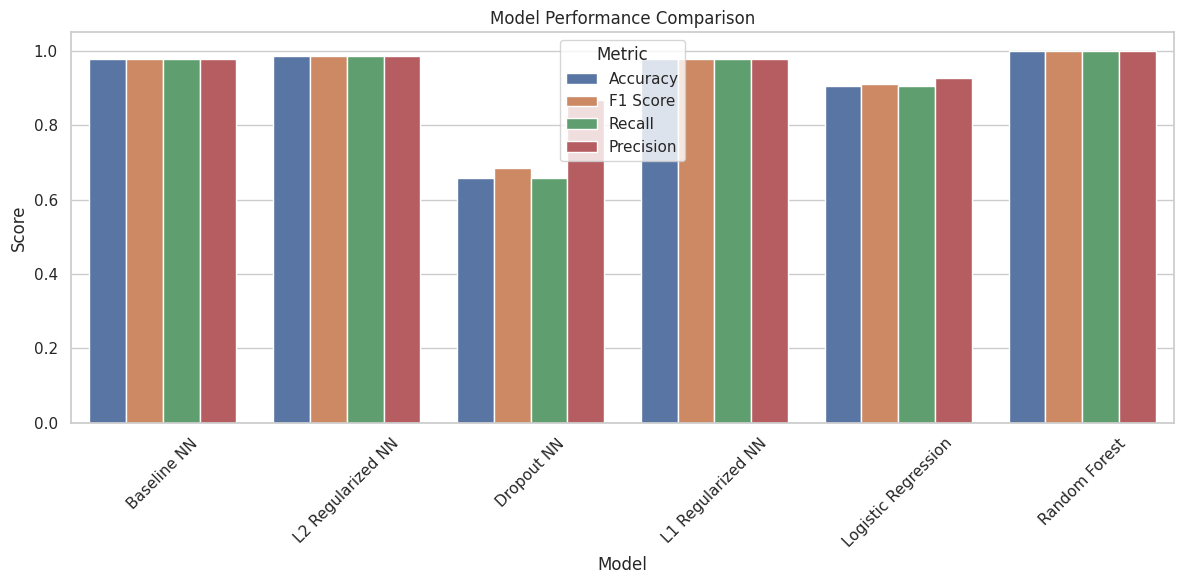


Best Performing Model:
--------------------------------------------------
Model: Random Forest
Configuration: GridSearchCV Optimized
F1 Score: 0.9998
Accuracy: 0.9998
Recall: 0.9998
Precision: 0.9998


In [14]:
# Compare All Models

# Add Random Forest results
results.append({
    'name': 'Random Forest',
    'config': 'GridSearchCV Optimized',
    'metrics': rf_metrics
})

# Create comparison DataFrame
comparison_df = pd.DataFrame([
    {
        'Model': r['name'],
        'Configuration': r['config'],
        'Accuracy': r['metrics']['accuracy'],
        'F1 Score': r['metrics']['f1'],
        'Recall': r['metrics']['recall'],
        'Precision': r['metrics']['precision']
    }
    for r in results
])

# Display results
print("Model Comparison:")
print("-" * 100)
display(comparison_df.round(4))

# Plot comparison
metrics_to_plot = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
comparison_melted = pd.melt(comparison_df,
                          id_vars=['Model'],
                          value_vars=metrics_to_plot,
                          var_name='Metric',
                          value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_melted, x='Model', y='Score', hue='Metric')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

# Find the best model based on F1 score
best_model_idx = comparison_df['F1 Score'].idxmax()
best_model = comparison_df.iloc[best_model_idx]

print("\nBest Performing Model:")
print("-" * 50)
print(f"Model: {best_model['Model']}")
print(f"Configuration: {best_model['Configuration']}")
print(f"F1 Score: {best_model['F1 Score']:.4f}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")


# Step 9: Model Visualization


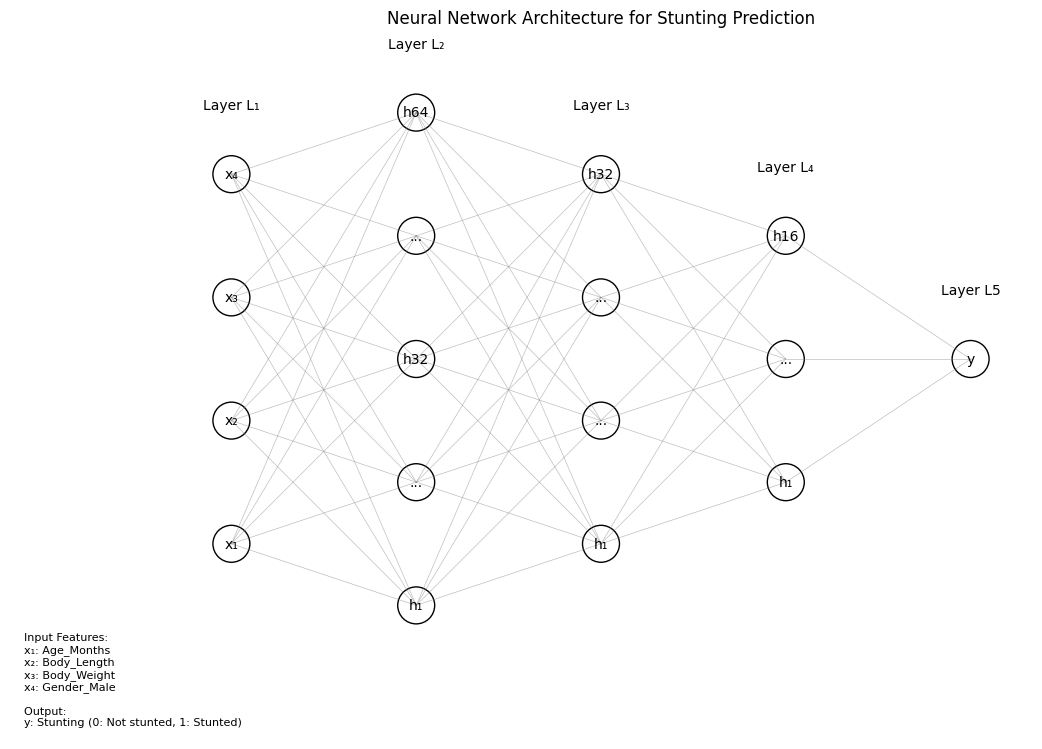

#10. Make Prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Prediction Distribution:
Normal              10864
Stunted              2445
Tall                  854
Severely Stunted      837
Name: count, dtype: int64

True Label Distribution:
Stunting
Normal              10864
Stunted              2445
Tall                  854
Severely Stunted      837
Name: count, dtype: int64


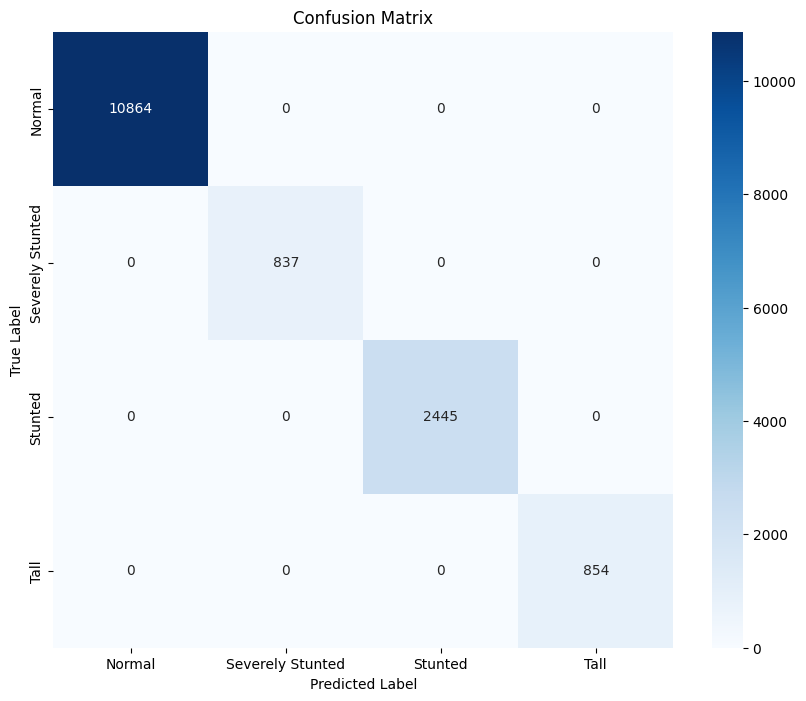


Accuracy: 1.0000


In [39]:
def simple_validate_predictions(model, X_test_raw, preprocessor, y_test):
    """
    Simple validation of predictions with proper preprocessing
    """
    # Transform test data using the same preprocessor
    X_test_transformed = preprocessor.transform(X_test_raw)

    # Get feature names
    num_features = preprocessor.named_transformers_['num'].get_feature_names_out()
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
    feature_names = np.concatenate([num_features, cat_features])

    # Make predictions
    y_pred = model.predict(X_test_transformed)

    # Print simple diagnostics
    print("\nPrediction Distribution:")
    print(pd.Series(y_pred).value_counts())

    print("\nTrue Label Distribution:")
    print(pd.Series(y_test).value_counts())

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Print accuracy
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

# Get raw test data (make sure to use the same features as in training)
X_test_raw = df.loc[X_test.index][['Age_Months', 'Body_Weight', 'Body_Length', 'Gender']]

# Load model if not already loaded
if 'loaded_model' not in locals():
    loaded_model = joblib.load('saved_models/random_forest_optimized.joblib')

# Run simple validation
simple_validate_predictions(loaded_model, X_test_raw, preprocessor, y_test)